## Plotting PID tuning for RPM

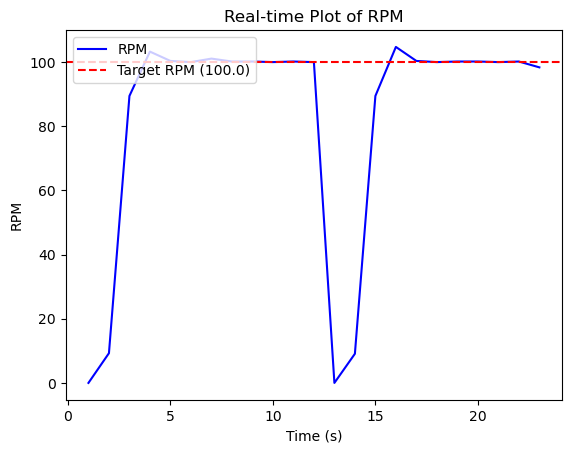

Process interrupted by user.
Serial connection closed.


In [1]:
import serial
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output, display

# Use interactive mode
%matplotlib inline

# Open the serial port (make sure the port is correct)
ser = serial.Serial('COM5', 115200)  # Replace 'COM5' with your port
time.sleep(2)  # Wait for ESP32 to reset

# Set up the plot
plt.figure(figsize=(10, 6))  # Set the figure size (width=10, height=6)
x_data, y_data = [], []  # Lists to store the x and y values

x = 0
rpm = 0
target_rpm = 0

try:
    while True:
        # Read data from the serial port
        line = ser.readline().decode('utf-8', errors='ignore').strip()
        # print(line)
        # Parse the line to extract x and y values
        if line.startswith("Target_RPM:"):
            # Extract x and y values
            parts = line.split()
            for part in parts:
                if "Current_RPM" in part:
                    rpm = float(part.split(":")[1])
                elif "Target_RPM" in part:
                    target_rpm = float(part.split(":")[1])
            x += 1
            # print(x, rpm)

        # Append the new data for plotting
        x_data.append(x)
        y_data.append(rpm)

        # Clear previous output (to update the graph in the same cell)
        clear_output(wait=True)

        # Plot the updated data
        plt.plot(x_data, y_data, label="RPM", color="blue")
        
        # Plot the horizontal line for target RPM
        plt.axhline(y=target_rpm, color='red', linestyle='--', label=f"Target RPM ({target_rpm})")
        
        # Set labels and title
        plt.xlabel("Time (s)")
        plt.ylabel("RPM")
        plt.title("Real-time Plot of RPM")

        # Redraw the plot
        plt.legend(loc="upper left")
        plt.show()

        # Pause to allow the plot to update
        time.sleep(0.1)

except KeyboardInterrupt:
    print("Process interrupted by user.")

finally:
    # Close the serial connection when done
    ser.close()
    print("Serial connection closed.")


## Plotting PID tuning for Position

In [3]:
import serial
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output, display

# Use interactive mode
%matplotlib inline

# Open the serial port (make sure the port is correct)
ser = serial.Serial('COM5', 115200)  # Replace 'COM5' with your port
time.sleep(2)  # Wait for ESP32 to reset

# Set up the plot
plt.figure(figsize=(10, 6))  # Set the figure size (width=10, height=6)
x_data, y_data = [], []  # Lists to store the x and y values

x = 0
position = 0
target_position = 0

try:
    while True:
        # Read data from the serial port
        line = ser.readline().decode('utf-8', errors='ignore').strip()
        # print(line)
        # Parse the line to extract x and y values
        if line.startswith("Target_position:"):
            # Extract x and y values
            parts = line.split()
            for part in parts:
                if "Current_position" in part:
                    position = float(part.split(":")[1])
                elif "Target_position" in part:
                    target_position = float(part.split(":")[1])
            x += 1
            # print(x, position)

        # Append the new data for plotting
        x_data.append(x)
        y_data.append(position)

        # Clear previous output (to update the graph in the same cell)
        clear_output(wait=True)

        # Plot the updated data
        plt.plot(x_data, y_data, label="Position", color="blue")
        
        # Plot the horizontal line for target Position
        plt.axhline(y=target_position, color='red', linestyle='--', label=f"Target Position ({target_position})")
        
        # Set labels and title
        plt.xlabel("Time (s)")
        plt.ylabel("Position")
        plt.title("Real-time Plot of Position")

        # Redraw the plot
        plt.legend(loc="upper left")
        plt.show()

        # Pause to allow the plot to update
        time.sleep(0.1)

except KeyboardInterrupt:
    print("Process interrupted by user.")

finally:
    # Close the serial connection when done
    ser.close()
    print("Serial connection closed.")


Process interrupted by user.
Serial connection closed.


### (Optional) Downsampling - Plot Every nth Data Point

In [5]:
import serial
import plotly.graph_objects as go
import time
import re
from IPython.display import display

# Open the serial port (make sure the port is correct)
ser = serial.Serial('COM5', 115200)  # Replace 'COM5' with your port
time.sleep(2)  # Wait for ESP32 to reset

# Create an empty plot
fig = go.FigureWidget(
    data=[go.Scatter(x=[], y=[], mode='lines', name='Position')],
    layout=go.Layout(
        title="Real-time Plot of Position",
        xaxis=dict(title="Time (s)"),
        yaxis=dict(title="Position")
    )
)
display(fig)

# Regular expression to match numbers (including floats)
number_regex = re.compile(r"[-+]?\d*\.\d+|\d+")

# Set up variables
start_time = time.time()  # Record the start time
position = 0
target_position = 0

try:
    while True:
        # Read data from the serial port
        line = ser.readline().decode('utf-8', errors='ignore').strip()

        # Parse the line to extract x and y values
        if line.startswith("Target_position:"):
            parts = line.split()
            for part in parts:
                # Search for numbers in the string using regex
                match = number_regex.search(part)
                if match:
                    # Extract the number from the matched part
                    number_str = match.group()
                    if "Current_position" in part:
                        position = float(number_str)
                    elif "Target_position" in part:
                        target_position = float(number_str)

            # Calculate elapsed time since the start
            elapsed_time = time.time() - start_time

            # Update the plot with new data
            fig.data[0].x = fig.data[0].x + (elapsed_time,)  # Append new time
            fig.data[0].y = fig.data[0].y + (position,)  # Append new position

            # Redraw the plot with a smooth update
            fig.update_layout(
                xaxis=dict(range=[min(fig.data[0].x), max(fig.data[0].x)]),
                yaxis=dict(range=[min(fig.data[0].y), max(fig.data[0].y)]),
            )

            # Optionally add target position as a horizontal line
            fig.add_shape(
                type="line",
                x0=fig.data[0].x[0], x1=fig.data[0].x[-1],
                y0=target_position, y1=target_position,
                line=dict(color="red", dash="dash")
            )

        # Pause to allow the plot to update (can adjust the interval)
        time.sleep(0.01)  # Update every 10 ms

except KeyboardInterrupt:
    print("Process interrupted by user.")

finally:
    # Close the serial connection when done
    ser.close()
    print("Serial connection closed.")


FigureWidget({
    'data': [{'mode': 'lines',
              'name': 'Position',
              'type': 'scatter',
              'uid': 'd7910050-8dde-4e8c-add7-7991c7ad2302',
              'x': [],
              'y': []}],
    'layout': {'template': '...',
               'title': {'text': 'Real-time Plot of Position'},
               'xaxis': {'title': {'text': 'Time (s)'}},
               'yaxis': {'title': {'text': 'Position'}}}
})

Process interrupted by user.
Serial connection closed.
